In [22]:
import pandas as pd
import folium
import matplotlib.pyplot as plt

In [23]:

df_21322_14 = pd.read_excel("analiza_jazdy_na_biegu_wstecznym/21322_data_table_full_2024-10-14.xlsx")  
df_21322_15 = pd.read_excel("analiza_jazdy_na_biegu_wstecznym/21322_data_table_full_2024-10-15.xlsx")  
df_21572_09 = pd.read_excel("analiza_jazdy_na_biegu_wstecznym/21572_data_table_full_2024-10-09.xlsx")  
df_21572_10 = pd.read_excel("analiza_jazdy_na_biegu_wstecznym/21572_data_table_full_2024-10-10.xlsx")  
df_21169_15 = pd.read_excel("analiza_jazdy_na_biegu_wstecznym/2305221        21169_data_table_full_2024-10-15.xlsx")  


In [24]:
results = []
dataframes = [df_21322_14, df_21322_15, df_21572_09, df_21572_10, df_21169_15]
names = ['df_21322_14', 'df_21322_15', 'df_21572_09', 'df_21572_10', 'df_21169_15']
columns_to_check = ["Date time", "Velocity [km/h]", "RPM", "Fuel level", 'predkosc_osi', "latitude", "longitude", 
                    "Vehicle mass [kg]", "distance_m", "Distance [km]", "Active gear"]
for df, name in zip(dataframes, names):
    missing_values = df[columns_to_check].isna()
    missing_count = missing_values.sum()
    missing_percentage = (missing_count / len(df)) * 100

    result_df = pd.DataFrame({
        'Table': [name] * len(columns_to_check),
        'Column': columns_to_check,
        'Missing Count': missing_count.values,
        'Missing Percentage': missing_percentage.values
    })
    results.append(result_df)

final_results = pd.concat(results, ignore_index=True)\
    .pivot(index='Column', columns='Table', values='Missing Percentage')

display(final_results)


Table,df_21169_15,df_21322_14,df_21322_15,df_21572_09,df_21572_10
Column,,,,,
Active gear,0.000000,0.000000,0.000000,0.000000,0.000000
Date time,0.000000,0.000000,0.000000,0.000000,0.000000
Distance [km],0.000000,0.000000,0.000000,0.000000,0.000000
Fuel level,0.000000,0.000000,0.000000,0.000000,2.522399
RPM,0.000000,0.000000,0.000000,0.000000,2.522399
Vehicle mass [kg],0.863775,0.942844,0.943949,1.012444,0.900243
Velocity [km/h],0.000000,0.000000,0.000000,0.000000,2.522399
distance_m,0.000000,0.000000,0.000000,0.000000,0.000000
latitude,0.000000,0.000000,0.000000,0.000000,0.214855


In [25]:
for df in [df_21322_14, df_21322_15, df_21572_09, df_21572_10, df_21169_15]:
    df_reverse = df[df["Active gear"] == -1]
    print("Percentage of Rows back",len(df_reverse)/len(df))
    print("Distance back m", df_reverse["distance_m"].sum(), "\nPercentage to all distance ", df_reverse["distance_m"].sum()/df["distance_m"].sum(),"\n")



Percentage of Rows back 0.02617011701170117
Distance back m 1040.13 
Percentage to all distance  0.014587503634148503 

Percentage of Rows back 0.029197080291970802
Distance back m 1378.55 
Percentage to all distance  0.013634404888466505 

Percentage of Rows back 0.01838830494140389
Distance back m 775.4399999999999 
Percentage to all distance  0.012532183375463366 

Percentage of Rows back 0.015233225189609609
Distance back m 529.95 
Percentage to all distance  0.009650808103801502 

Percentage of Rows back 0.010864187350540117
Distance back m 491.5799999999999 
Percentage to all distance  0.00702412175258682 



In [26]:
for df_cleared in [df_21322_14, df_21322_15, df_21572_09, df_21572_10, df_21169_15]:
    print(df_cleared["Distance [km]"].max())
    df_cleared = df_cleared[df_cleared["Active gear"] == -1]
    print(df_cleared["distance_m"].sum())

71.303
1040.13
101.108
1378.55
61.876
775.4399999999999
54.912
529.95
69.985
491.5799999999999


In [27]:
for df_cleared in [df_21322_14, df_21322_15, df_21572_09, df_21572_10, df_21169_15]:
    df_cleared = df_cleared[df_cleared["distance_m"] > 0]
    min_date = df_cleared['Date time'].min()
    max_date = df_cleared['Date time'].max()
    date_difference = max_date - min_date

    print(f"Min Date: {min_date}")
    print(f"Max Date: {max_date}")
    print(f"Working hours: {date_difference}", "\n")

Min Date: 2024-10-14 06:01:12
Max Date: 2024-10-14 17:52:53
Working hours: 0 days 11:51:41 

Min Date: 2024-10-15 06:21:19
Max Date: 2024-10-15 18:09:15
Working hours: 0 days 11:47:56 

Min Date: 2024-10-09 06:22:07
Max Date: 2024-10-09 17:20:47
Working hours: 0 days 10:58:40 

Min Date: 2024-10-10 05:52:57
Max Date: 2024-10-10 18:10:14
Working hours: 0 days 12:17:17 

Min Date: 2024-10-15 06:22:51
Max Date: 2024-10-15 18:27:11
Working hours: 0 days 12:04:20 



C:\Users\User\AppData\Local\Temp\ipykernel_29152\4008533437.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleared_reverse_mass_time["Time"] = df_cleared_reverse_mass_time["Date time"].dt.strftime('%H:%M')


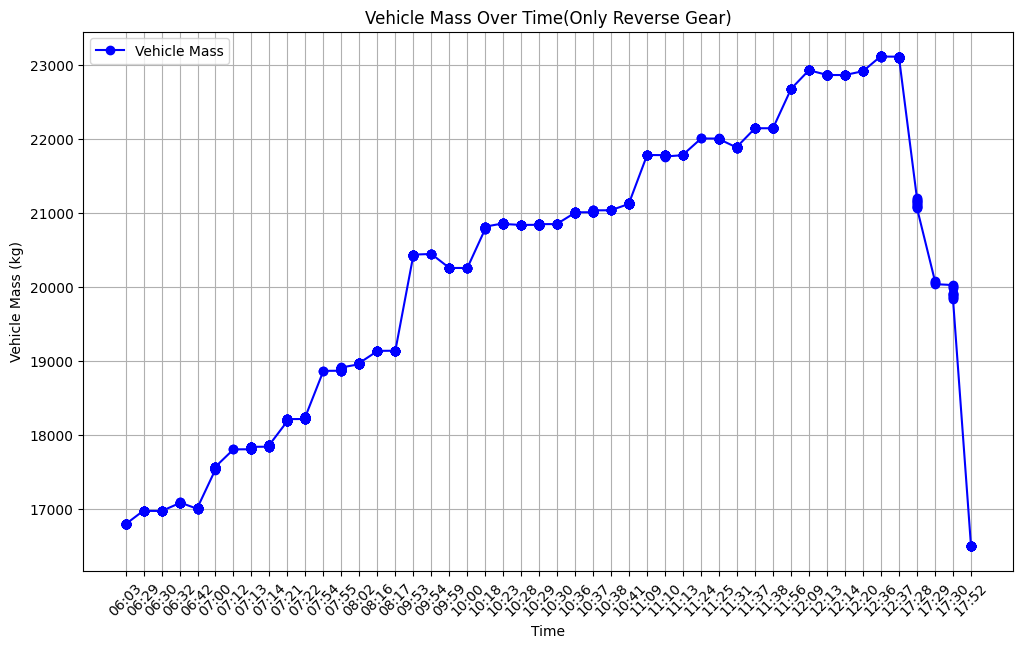

C:\Users\User\AppData\Local\Temp\ipykernel_29152\4008533437.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleared_reverse_mass_time["Time"] = df_cleared_reverse_mass_time["Date time"].dt.strftime('%H:%M')


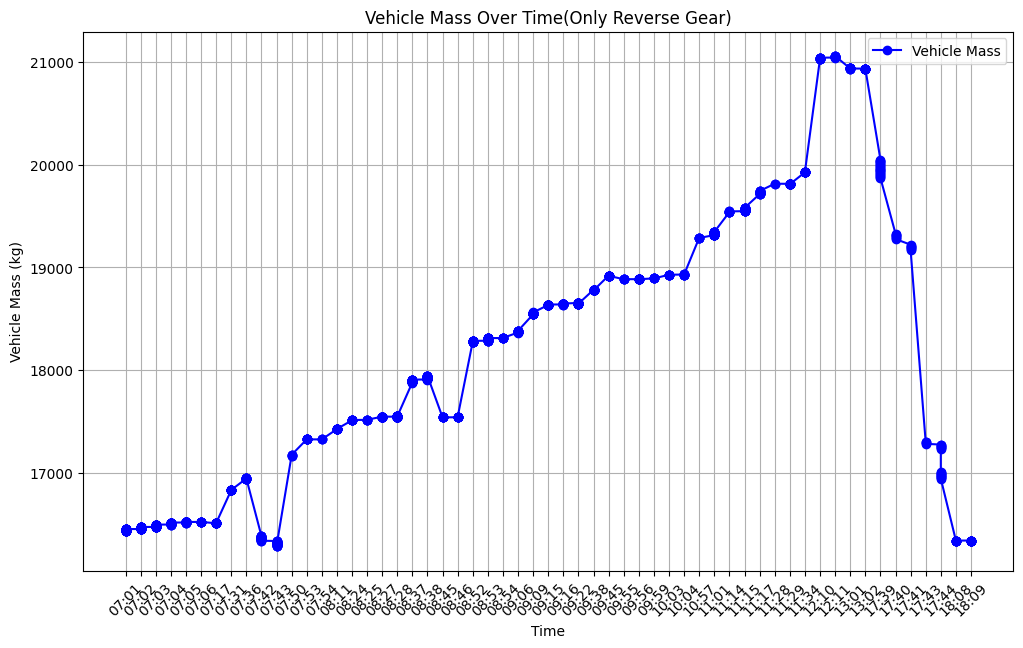

C:\Users\User\AppData\Local\Temp\ipykernel_29152\4008533437.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleared_reverse_mass_time["Time"] = df_cleared_reverse_mass_time["Date time"].dt.strftime('%H:%M')


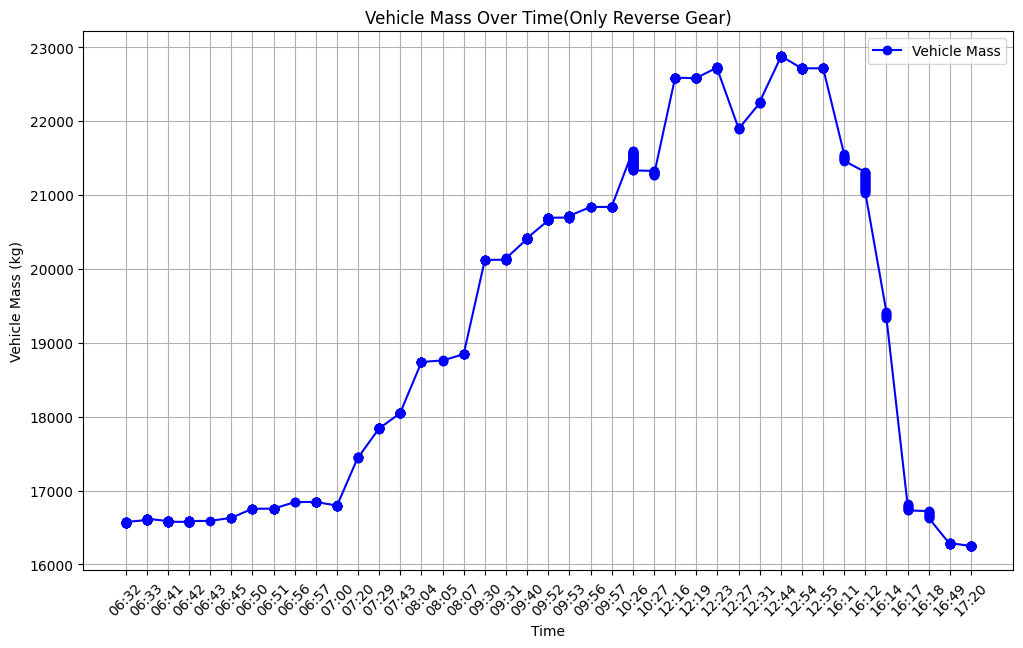

C:\Users\User\AppData\Local\Temp\ipykernel_29152\4008533437.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleared_reverse_mass_time["Time"] = df_cleared_reverse_mass_time["Date time"].dt.strftime('%H:%M')


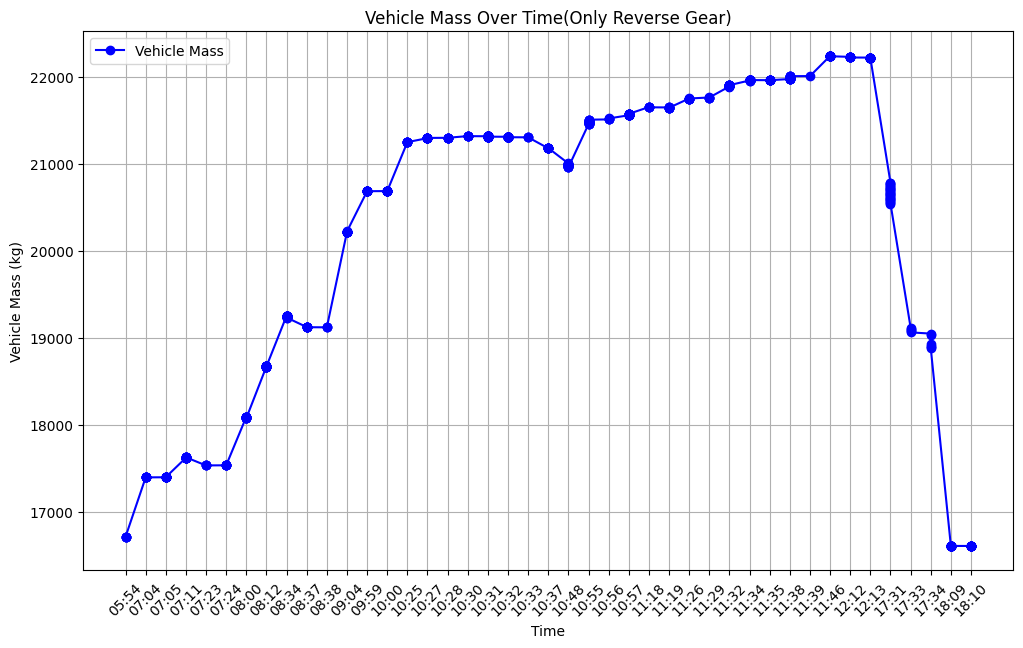

C:\Users\User\AppData\Local\Temp\ipykernel_29152\4008533437.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleared_reverse_mass_time["Time"] = df_cleared_reverse_mass_time["Date time"].dt.strftime('%H:%M')


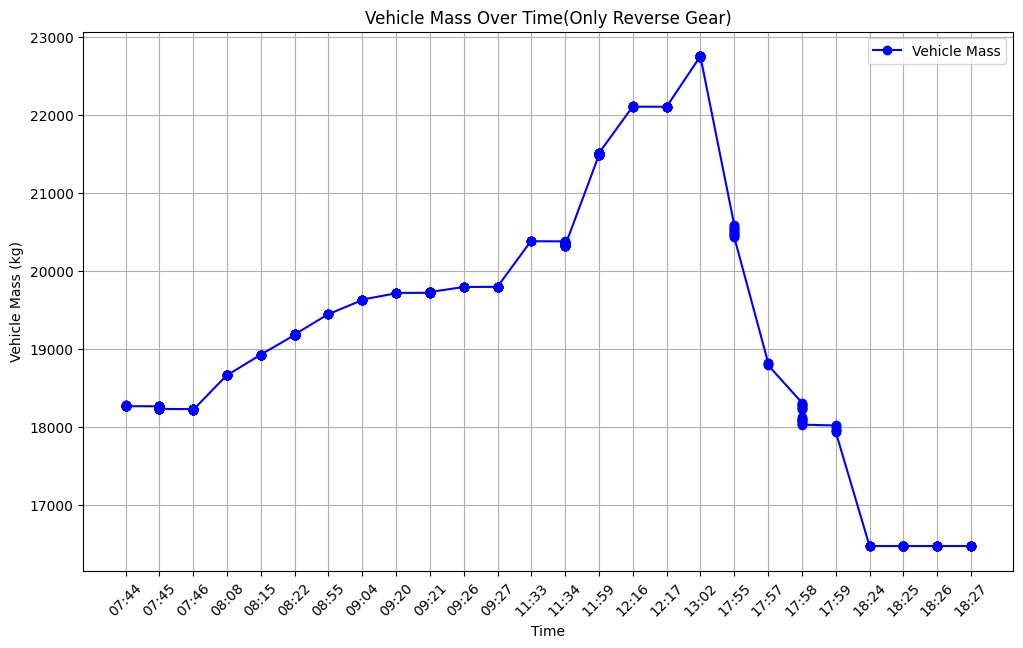

In [28]:
for df_cleared in [df_21322_14, df_21322_15, df_21572_09, df_21572_10, df_21169_15]:
    df_cleared_reverse = df_cleared[df_cleared["Active gear"] == -1]
    df_cleared_reverse_mass_time = df_cleared_reverse[['Date time', 'Vehicle mass [kg]']]

    df_cleared_reverse_mass_time["Time"] = df_cleared_reverse_mass_time["Date time"].dt.strftime('%H:%M')
    plt.figure(figsize=(12, 7))
    plt.plot(df_cleared_reverse_mass_time["Time"], df_cleared_reverse_mass_time["Vehicle mass [kg]"], 
            marker='o', linestyle='-', label="Vehicle Mass", color='b')

    plt.xlabel("Time")
    plt.ylabel("Vehicle Mass (kg)")
    plt.title("Vehicle Mass Over Time(Only Reverse Gear)")
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.show()

In [29]:
# Display length and details of each dataframe
for df_cleared in [df_21322_14, df_21322_15, df_21572_09, df_21572_10, df_21169_15]:
    df_cleared = df_cleared[df_cleared["Active gear"] == -1]
    df_cleared = df_cleared[["Date time","Velocity [km/h]", "Active gear", "predkosc_osi", "distance_m", "Distance [km]","latitude", "longitude"]]
    display(df_cleared.describe())
    # display(df_cleared)

,Date time,Velocity [km/h],Active gear,predkosc_osi,distance_m,Distance [km],latitude,longitude
count,1163,1163.000000,1163.0,1163.000000,1163.000000,1163.000000,1163.000000,1163.000000
mean,2024-10-14 10:06:06.147893248,3.392267,-1.0,3.092205,0.894351,22.300743,53.438117,9.958847
min,2024-10-14 06:03:08,0.000000,-1.0,0.000000,0.000000,0.222000,53.426000,9.000000
25%,2024-10-14 07:22:39.500000,1.774000,-1.0,0.000000,0.490000,8.964500,53.429000,9.961000
50%,2024-10-14 10:30:08,3.288000,-1.0,3.309000,0.900000,23.702000,53.434000,9.965000
75%,2024-10-14 11:38:03.500000,4.972500,-1.0,4.762000,1.360000,29.659000,53.441000,9.971000
max,2024-10-14 17:52:50,48.060000,-1.0,9.238000,2.150000,71.302000,53.533000,10.079000
std,NaN,2.923257,0.0,2.252165,0.548529,13.152335,0.018210,0.103589


,Date time,Velocity [km/h],Active gear,predkosc_osi,distance_m,Distance [km],latitude,longitude
count,1296,1296.000000,1296.0,1296.000000,1296.000000,1296.000000,1296.000000,1296.000000
mean,2024-10-15 09:24:15.304012288,3.829173,-1.0,3.679154,1.063696,31.491701,53.527674,9.883695
min,2024-10-15 07:01:08,0.000000,-1.0,0.000000,0.000000,16.429000,53.461000,9.845000
25%,2024-10-15 07:31:04.750000128,2.890000,-1.0,2.838000,0.800000,19.746750,53.527000,9.863000
50%,2024-10-15 08:52:54.500000,4.271000,-1.0,4.273000,1.190000,26.885500,53.530000,9.871000
75%,2024-10-15 09:56:09.249999872,4.969000,-1.0,4.992000,1.380000,35.377500,53.533000,9.880000
max,2024-10-15 18:09:13,7.476000,-1.0,8.055000,2.080000,101.108000,53.540000,10.079000
std,NaN,1.657123,0.0,1.969583,0.460243,17.988900,0.013468,0.049525


,Date time,Velocity [km/h],Active gear,predkosc_osi,distance_m,Distance [km],latitude,longitude
count,761,761.000000,761.0,761.000000,761.000000,761.000000,761.000000,761.000000
mean,2024-10-09 10:33:12.363994624,3.669054,-1.0,3.548963,1.018975,22.636240,53.640363,10.098558
min,2024-10-09 06:32:05,0.000000,-1.0,0.000000,0.000000,4.000000,53.629000,10.058000
25%,2024-10-09 07:29:26,2.180000,-1.0,0.000000,0.610000,9.077000,53.630000,10.063000
50%,2024-10-09 09:53:33,3.662000,-1.0,3.816000,1.020000,17.066000,53.636000,10.078000
75%,2024-10-09 12:44:32,5.331000,-1.0,5.793000,1.480000,33.430000,53.643000,10.097000
max,2024-10-09 17:20:40,7.188000,-1.0,9.750000,2.000000,61.870000,53.685000,10.258000
std,NaN,2.094296,0.0,2.729991,0.581654,16.472332,0.015904,0.058113


,Date time,Velocity [km/h],predkosc_osi,distance_m,Distance [km],latitude,longitude
count,709,675.000000,675.000000,709.000000,709.000000,709.000000,709.000000
mean,2024-10-10 11:09:09.339915520,2.638941,2.342766,0.747461,21.870904,53.655777,10.109027
min,2024-10-10 05:54:05,0.000000,0.000000,0.000000,0.138000,53.644000,10.084000
25%,2024-10-10 10:00:02,0.000000,0.000000,0.000000,15.065000,53.651000,10.094000
50%,2024-10-10 10:37:40,2.827000,2.523000,0.810000,17.621000,53.653000,10.098000
75%,2024-10-10 11:34:52,4.167500,4.125000,1.180000,24.916000,53.658000,10.106000
max,2024-10-10 18:10:14,7.297000,7.543000,2.030000,54.912000,53.685000,10.258000
std,NaN,2.087111,2.328534,0.579048,12.101743,0.009482,0.037071


,Date time,Velocity [km/h],Active gear,predkosc_osi,distance_m,Distance [km],latitude,longitude
count,527,527.000000,527.0,527.000000,527.000000,527.000000,527.000000,527.000000
mean,2024-10-15 11:43:55.056925952,3.358732,-1.0,3.107030,0.932789,29.906890,53.472565,9.959472
min,2024-10-15 07:44:37,0.000000,-1.0,0.000000,0.000000,11.014000,53.461000,9.877000
25%,2024-10-15 08:15:46.500000,2.578000,-1.0,2.480000,0.720000,13.152000,53.463000,9.944000
50%,2024-10-15 09:27:02,3.397000,-1.0,3.363000,0.940000,16.868000,53.468000,9.945000
75%,2024-10-15 17:55:27.500000,4.405000,-1.0,4.508000,1.225000,54.124500,53.474000,10.001000
max,2024-10-15 18:27:08,6.466000,-1.0,7.797000,1.800000,69.984000,53.533000,10.079000
std,NaN,1.483898,0.0,1.828291,0.412167,21.748623,0.018646,0.050393


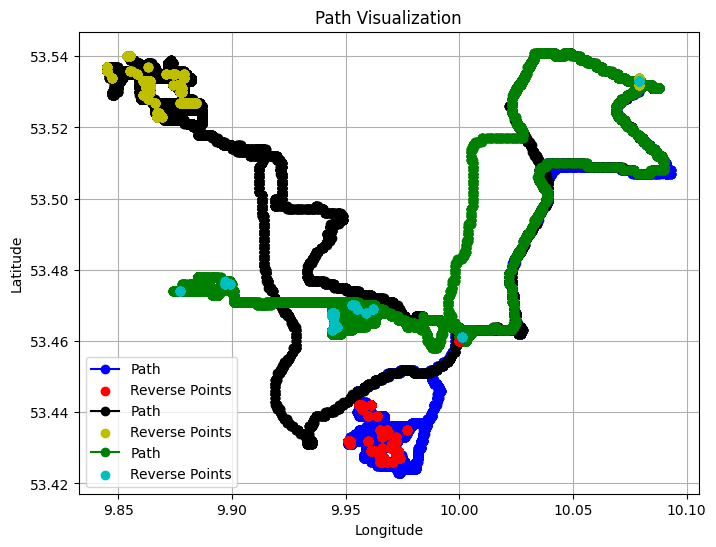

In [30]:
import pandas as pd
import folium
import matplotlib.pyplot as plt

# 21322_14
center_lat, center_lon = df_21322_14["latitude"].mean(), df_21322_14["longitude"].mean()
m = folium.Map(location=[center_lat, center_lon], zoom_start=15)
for i, row in df.iterrows():
    folium.Marker([row["latitude"], row["longitude"]], popup=f"Point {i}").add_to(m)
folium.PolyLine(df[["latitude", "longitude"]].values, color="blue", weight=3).add_to(m)

# Filtering out points with longitude less than 9.9
df_21322_14 = df_21322_14[df_21322_14["longitude"] > 9.9]

# Creating reverse points
df_21322_14_reverse = df_21322_14[df_21322_14["Active gear"] == -1]
for i, row in df_21322_14_reverse.iterrows():
    folium.Marker(
        [row["latitude"], row["longitude"]],
        popup=f"Reverse Point {i}",
        icon=folium.Icon(color="red")
    ).add_to(m)


# 21322_15
center_lat, center_lon = df_21322_15["latitude"].mean(), df_21322_15["longitude"].mean()
m = folium.Map(location=[center_lat, center_lon], zoom_start=15)
for i, row in df.iterrows():
    folium.Marker([row["latitude"], row["longitude"]], popup=f"Point {i}").add_to(m)
folium.PolyLine(df[["latitude", "longitude"]].values, color="blue", weight=3).add_to(m)

# Creating reverse points
df_21322_15_reverse = df_21322_15[df_21322_15["Active gear"] == -1]
for i, row in df_21322_15_reverse.iterrows():
    folium.Marker(
        [row["latitude"], row["longitude"]],
        popup=f"Reverse Point {i}",
        icon=folium.Icon(color="red")
    ).add_to(m)


# 21660_15
center_lat, center_lon = df_21169_15["latitude"].mean(), df_21169_15["longitude"].mean()
m = folium.Map(location=[center_lat, center_lon], zoom_start=15)
for i, row in df.iterrows():
    folium.Marker([row["latitude"], row["longitude"]], popup=f"Point {i}").add_to(m)
folium.PolyLine(df[["latitude", "longitude"]].values, color="blue", weight=3).add_to(m)

# Creating reverse points
df_21169_15_reverse = df_21169_15[df_21169_15["Active gear"] == -1]
for i, row in df_21169_15_reverse.iterrows():
    folium.Marker(
        [row["latitude"], row["longitude"]],
        popup=f"Reverse Point {i}",
        icon=folium.Icon(color="red")
    ).add_to(m)


plt.figure(figsize=(8, 6))
plt.plot(df_21322_14["longitude"], df_21322_14["latitude"], marker="o", linestyle="-", color="b", label="Path")
plt.scatter(df_21322_14_reverse["longitude"], df_21322_14_reverse["latitude"], color="red", label="Reverse Points", zorder=3)
plt.plot(df_21322_15["longitude"], df_21322_15["latitude"], marker="o", linestyle="-", color="k", label="Path")
plt.scatter(df_21322_15_reverse["longitude"], df_21322_15_reverse["latitude"], color="y", label="Reverse Points", zorder=3)
plt.plot(df_21169_15["longitude"], df_21169_15["latitude"], marker="o", linestyle="-", color="g", label="Path")
plt.scatter(df_21169_15_reverse["longitude"], df_21169_15_reverse["latitude"], color="c", label="Reverse Points", zorder=3)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Path Visualization")
plt.legend()
plt.grid()
plt.show()


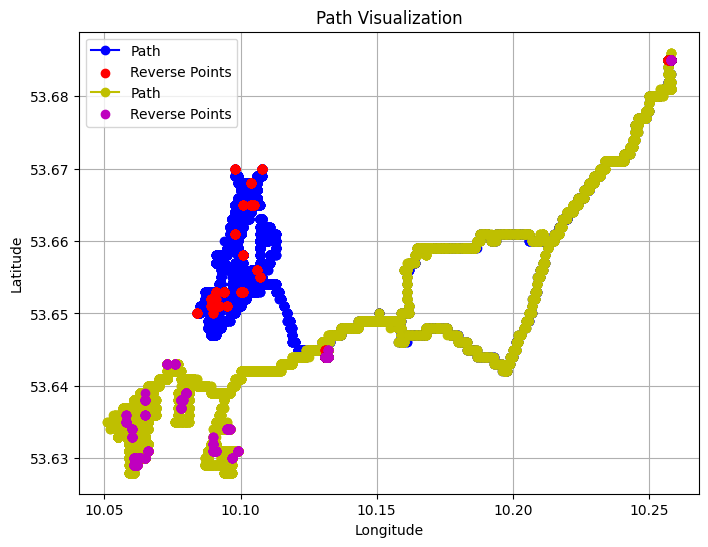

In [31]:
import pandas as pd
import folium
import matplotlib.pyplot as plt

center_lat, center_lon = df_21572_09["latitude"].mean(), df_21572_09["longitude"].mean()
m = folium.Map(location=[center_lat, center_lon], zoom_start=15)
for i, row in df.iterrows():
    folium.Marker([row["latitude"], row["longitude"]], popup=f"Point {i}").add_to(m)
folium.PolyLine(df[["latitude", "longitude"]].values, color="blue", weight=3).add_to(m)

# Creating reverse points
df_21572_09_reverse = df_21572_09[df_21572_09["Active gear"] == -1]
for i, row in df_21572_09_reverse.iterrows():
    folium.Marker(
        [row["latitude"], row["longitude"]],
        popup=f"Reverse Point {i}",
        icon=folium.Icon(color="red")
    ).add_to(m)


center_lat, center_lon = df_21572_10["latitude"].mean(), df_21572_10["longitude"].mean()
m = folium.Map(location=[center_lat, center_lon], zoom_start=15)
for i, row in df.iterrows():
    folium.Marker([row["latitude"], row["longitude"]], popup=f"Point {i}").add_to(m)
folium.PolyLine(df[["latitude", "longitude"]].values, color="blue", weight=3).add_to(m)

# Creating reverse points
df_21572_10_reverse = df_21572_10[df_21572_10["Active gear"] == -1]
for i, row in df_21572_10_reverse.iterrows():
    folium.Marker(
        [row["latitude"], row["longitude"]],
        popup=f"Reverse Point {i}",
        icon=folium.Icon(color="red")
    ).add_to(m)

plt.figure(figsize=(8, 6))
plt.plot(df_21572_10["longitude"], df_21572_10["latitude"], marker="o", linestyle="-", color="b", label="Path")
plt.scatter(df_21572_10_reverse["longitude"], df_21572_10_reverse["latitude"], color="red", label="Reverse Points", zorder=3)
plt.plot(df_21572_09["longitude"], df_21572_09["latitude"], marker="o", linestyle="-", color="y", label="Path")
plt.scatter(df_21572_09_reverse["longitude"], df_21572_09_reverse["latitude"], color="m", label="Reverse Points", zorder=3)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Path Visualization")
plt.legend()
plt.grid()
plt.show()
